In [105]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

In [100]:
class LDA:
    def __init__(self):
        self.w = None
    
    def fit(self, data, target):
        cls1 = data[target == 0]
        cls2 = data[target == 1]

        mean1 = np.mean(cls1, axis=0)
        mean2 = np.mean(cls2, axis=0)

        # クラス内総変動
        S_W = np.dot((cls1 - mean1).T, cls1 - mean1) + np.dot((cls2 - mean2).T, cls2 - mean2)   

        self.w = np.dot(np.linalg.inv(S_W), (mean1 - mean2))

        # 通る点: 平均値の中点
        mean = (mean1 + mean2) / 2
        # 傾き
        m = self.w[1] / self.w[0]
        a = -1 / m
        # y = ax + b <=> b = -ax + y
        b = -a * mean[0] + mean[1]

        x = np.linspace(-8, 8, 1000)
        y = a * x + b

        self.plot(cls1, cls2, [x, y])

        return x, y
        
    def transform(self, X):
        return np.dot(X, self.w)

    def plot(self, cls1, cls2, line=None):
        x, y = cls1.T
        plt.plot(x, y, 'bo', ms=3, label='class1')
        x, y = cls2.T
        plt.plot(x, y, 'ro', ms=3, label='class2')

        if not (line is None):
            plt.plot(line[0], line[1], 'k-', ms=5)

        plt.xlim(-10,10)
        plt.ylim(-10,10)

        plt.show()

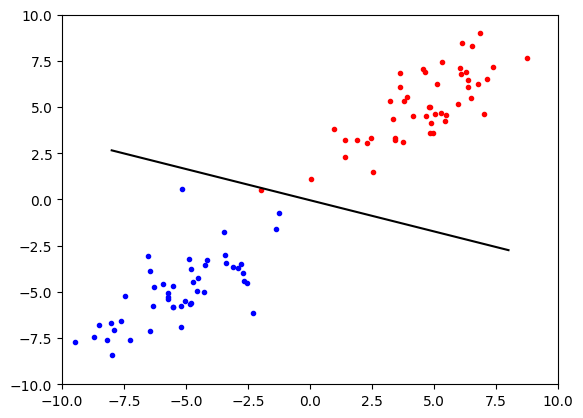

In [107]:
warnings.filterwarnings('ignore')

cov = [[4, 5],[5, 4]] # 共分散
cls1 = np.random.multivariate_normal([-5, -5], cov, 50)
cls2 = np.random.multivariate_normal([5, 5], cov, 50)

data = np.concatenate([cls1, cls2], axis=0)
target = np.concatenate([np.zeros(50), np.ones(50)], axis=0)

lda = LDA()
x, y = lda.fit(data, target)

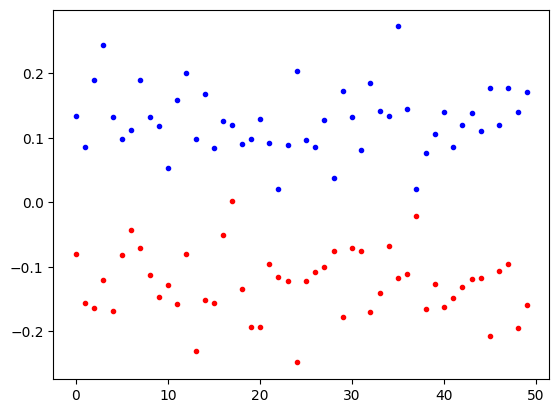

In [126]:
projected = lda.transform(data)
plt.plot(projected[target == 0], 'bo', ms=3, label='class1')
plt.plot(projected[target == 1], 'ro', ms=3, label='class2')